<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clasificaci%C3%B3n_basada_en_arboles_Proyecto_1_Parte_final_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1- Parte final (Core)**
**Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.

**Instrucciones Detalladas**

**Parte 1: Exploración y Visualización de Datos (EDA)**

1.  **Carga y Exploración Inicial de Datos:**
* Cargar el [dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset) y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.
2.  **Análisis de Correlación:**
* Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.
3.  **Visualización de Datos:**
* Crear subplots para comparar diferentes variables clave.
* Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

**Parte 2: Preprocesamiento de Datos**

1.  **Transformación de Columnas:**
* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas y escalado de variables numéricas.
2.  **Pipelines:**
* Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.


**Parte 3: Benchmarking de Técnicas de Machine Learning**

1.  **Selección de Modelos:**
* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
* Utilizar validación cruzada para evaluar el rendimiento de los modelos.
2.  **Comparación de Modelos:**
* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Seleccionar el mejor modelo basado en las métricas obtenidas.

**Parte 4: Análisis de Métricas**

1.  **Informe de Clasificación:**
* Generar un informe de clasificación para los modelos evaluados.
* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.
2.  **Curva ROC y AUC:**
* Crear y visualizar la curva ROC para los modelos de clasificación binaria.
* Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

**Parte 5: Presentación de Resultados**

1.  **Preparación de la Presentación (One-Page en PPT):**
* Introducción y objetivos del proyecto.
* Descripción del conjunto de datos.
* Principales análisis y hallazgos.
* Visualizaciones clave con explicación.
* Conclusiones y recomendaciones.

In [2]:
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')
retail_sales_dataset = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/retail_sales_dataset.csv"
df = pd.read_csv(retail_sales_dataset)

# Separar features (X) y variable objetivo (y)
X = df[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit']]
y = df['Total Amount']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline para preprocesar los datos
# 1. OneHotEncoder para las variables categóricas
# 2. StandardScaler para las variables numéricas
numeric_features = ['Age', 'Quantity', 'Price per Unit']
categorical_features = ['Gender', 'Product Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Ajustar el preprocesador y transformar los datos
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


# Crear y ajustar el regresor lazy
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Mostrar los resultados
print("\nRendimiento de los modelos:")
print(models_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 42/42 [00:03<00:00, 13.95it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 454.062500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i


Resultados de los modelos:
                         RMSE        R2         MAE  CV Score
Linear Regression  205.788887  0.855330  173.703384  0.844538
KNN                123.176658  0.948169   75.958333  0.949969
Decision Tree        0.000000  1.000000    0.000000  1.000000
Random Forest        0.000000  1.000000    0.000000  1.000000
XGBoost              0.007296  1.000000    0.002507  1.000000


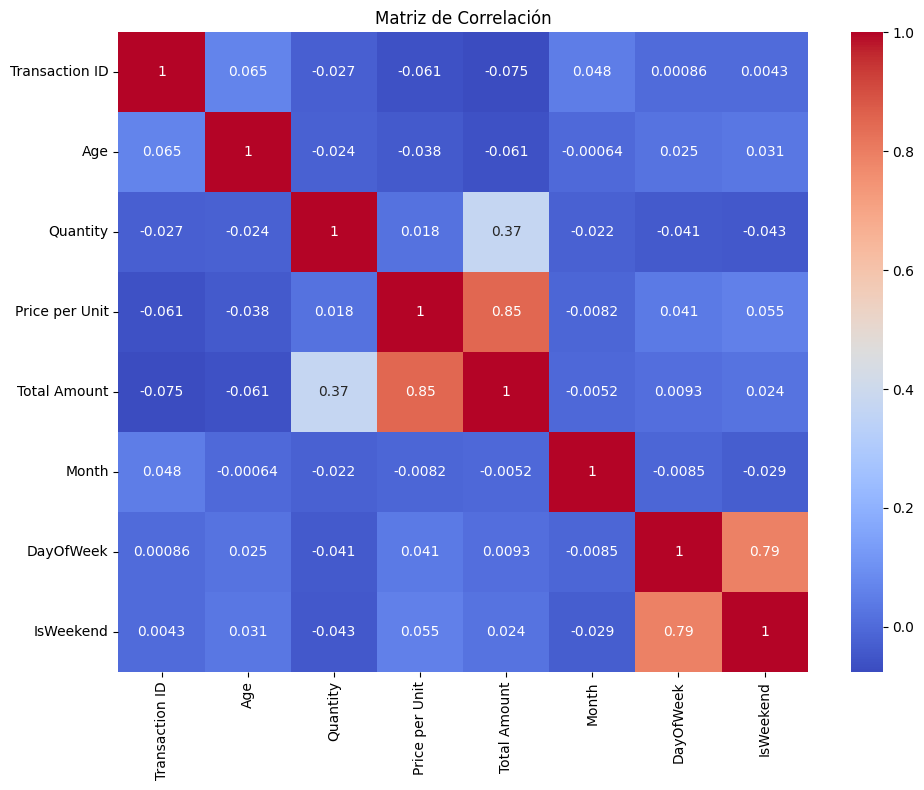


Comparación de Modelos (Clasificación):
               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Linear Regression     0.925   0.802632  1.000000  0.890511  0.981248
1                KNN     0.945   0.857143  0.983607  0.916031  0.996816
2      Decision Tree     1.000   1.000000  1.000000  1.000000  1.000000
3      Random Forest     1.000   1.000000  1.000000  1.000000  1.000000
4            XGBoost     0.985   0.953125  1.000000  0.976000  1.000000


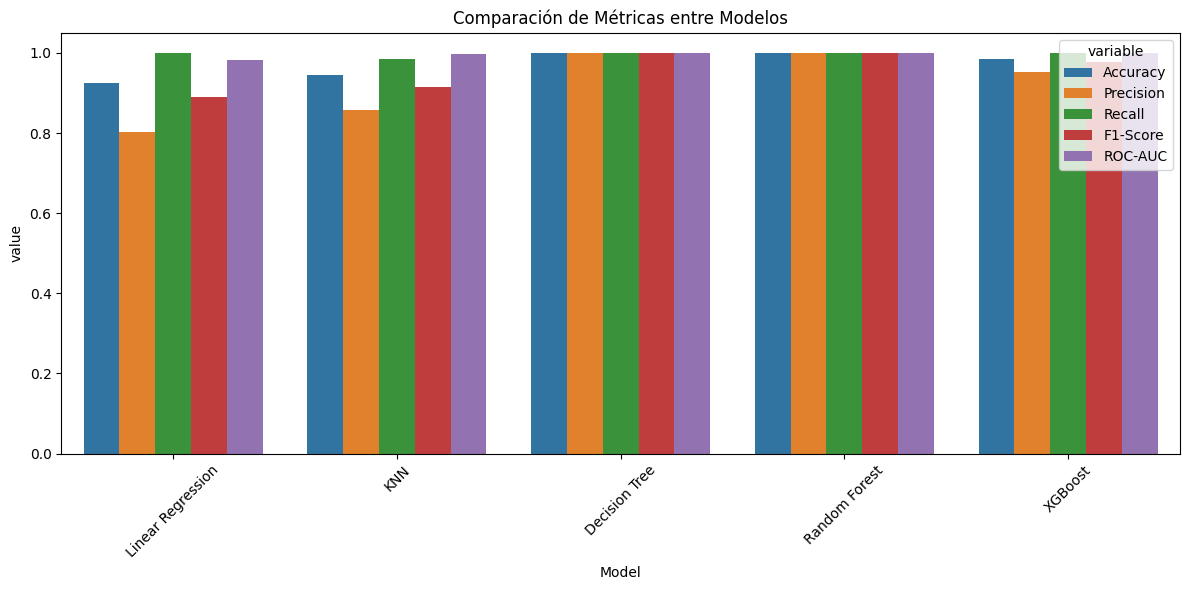

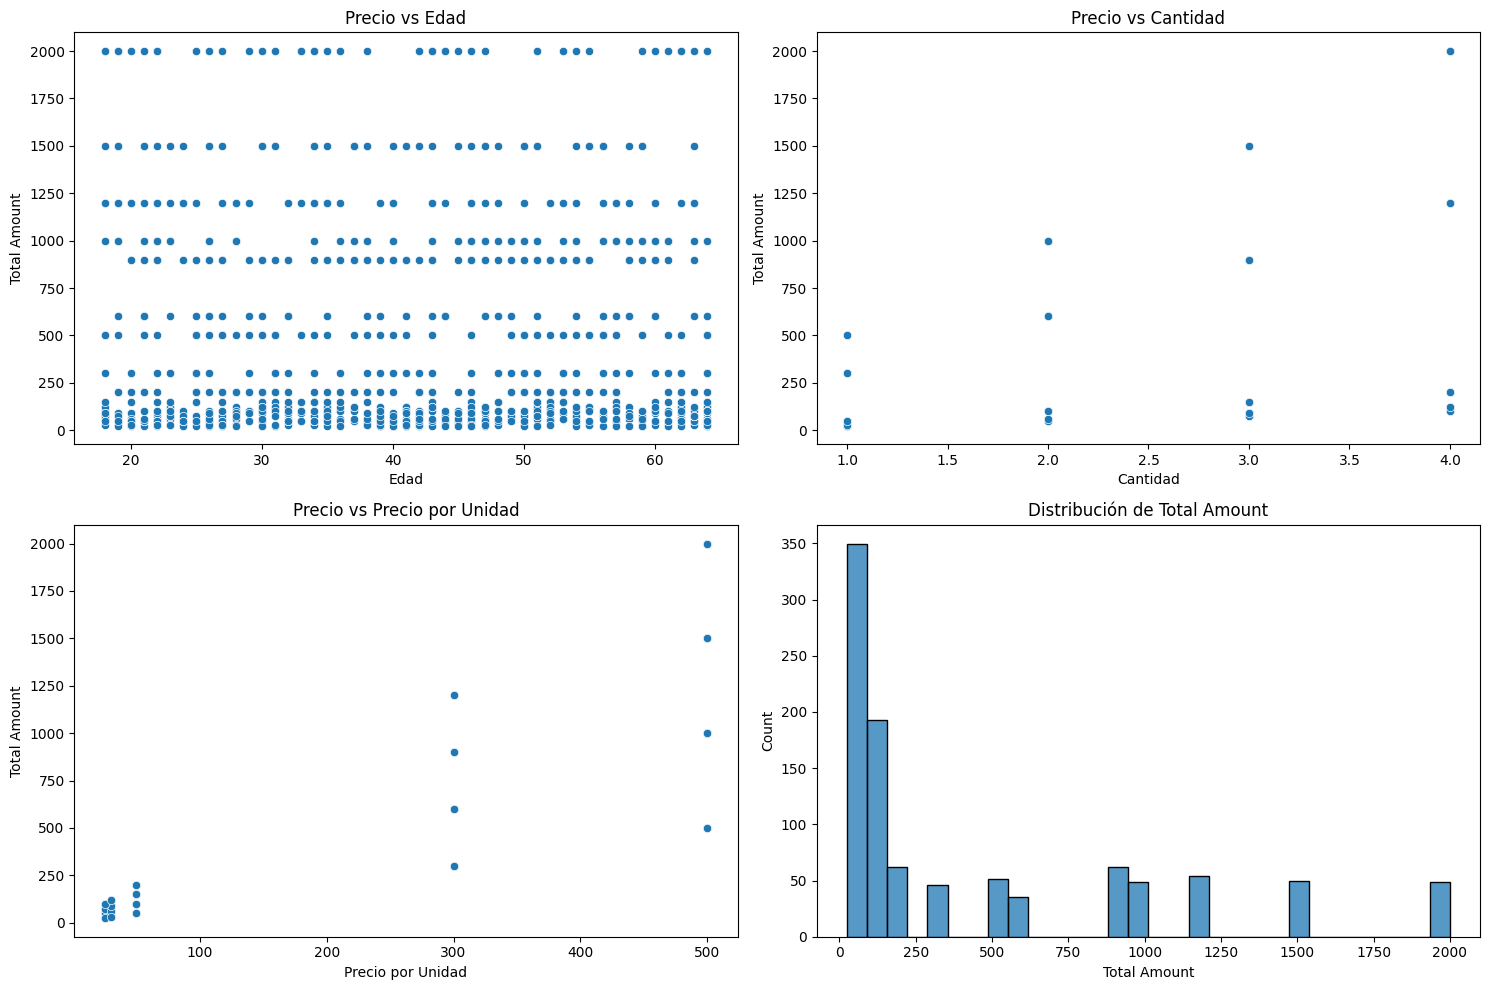

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(retail_sales_dataset)

# Parte 2: Preprocesamiento de Datos
def preprocess_data(df):
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

    X = df.drop(['Transaction ID', 'Customer ID', 'Date', 'Total Amount'], axis=1)
    y = df['Total Amount']

    numeric_features = ['Age', 'Quantity', 'Price per Unit', 'Month', 'DayOfWeek']
    categorical_features = ['Gender', 'Product Category']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

    return X, y, preprocessor, numeric_features, categorical_features

# Parte 3: Benchmarking y Evaluación de Modelos
def train_and_evaluate_models(X, y, preprocessor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {
                'regressor__n_neighbors': [3, 5, 7, 9]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'regressor__max_depth': [3, 5, 7, 10],
                'regressor__min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'regressor__n_estimators': [100, 200],
                'regressor__max_depth': [5, 10]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'regressor__n_estimators': [100, 200],
                'regressor__max_depth': [3, 5]
            }
        }
    }

    results = {}
    best_models = {}

    for name, model_info in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model_info['model'])
        ])

        if model_info['params']:
            grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='r2')
            grid_search.fit(X_train, y_train)
            best_pipeline = grid_search.best_estimator_
        else:
            best_pipeline = pipeline
            best_pipeline.fit(X_train, y_train)

        best_models[name] = best_pipeline
        y_pred = best_pipeline.predict(X_test)

        results[name] = {
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'CV Score': np.mean(cross_val_score(best_pipeline, X, y, cv=5, scoring='r2'))
        }

    return results, best_models, X_test, y_test

# Parte 4: Comparación de Modelos
def compare_models_classification(best_models, X_test, y_test, threshold=500):
    # Convertir el problema en binario
    y_test_bin = (y_test > threshold).astype(int)

    # Definir diccionario para almacenar métricas
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'ROC-AUC': []
    }

    # Evaluar cada modelo
    for name, model in best_models.items():
        y_pred = model.predict(X_test)
        y_pred_bin = (y_pred > threshold).astype(int)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

        metrics['Model'].append(name)
        metrics['Accuracy'].append(accuracy_score(y_test_bin, y_pred_bin))
        metrics['Precision'].append(precision_score(y_test_bin, y_pred_bin))
        metrics['Recall'].append(recall_score(y_test_bin, y_pred_bin))
        metrics['F1-Score'].append(f1_score(y_test_bin, y_pred_bin))
        metrics['ROC-AUC'].append(roc_auc_score(y_test_bin, y_pred_proba))

    return pd.DataFrame(metrics)

# Ejecutar análisis completo
df['Date'] = pd.to_datetime(df['Date'])
X, y, preprocessor, numeric_features, categorical_features = preprocess_data(df)
results, best_models, X_test, y_test = train_and_evaluate_models(X, y, preprocessor)

print("\nResultados de los modelos:")
results_df = pd.DataFrame(results).T
print(results_df)

# Análisis de Correlación
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Comparar modelos utilizando métricas de clasificación
metrics_df = compare_models_classification(best_models, X_test, y_test, threshold=500)

# Mostrar resultados de comparación de modelos
print("\nComparación de Modelos (Clasificación):")
print(metrics_df)

# Visualizar comparación de modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización de Datos
plt.figure(figsize=(15, 10))

# Precio vs Edad
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='Total Amount')
plt.title('Precio vs Edad')
plt.xlabel('Edad')
plt.ylabel('Total Amount')

# Precio vs Cantidad
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Quantity', y='Total Amount')
plt.title('Precio vs Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Total Amount')

# Precio vs Precio por Unidad
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount')
plt.title('Precio vs Precio por Unidad')
plt.xlabel('Precio por Unidad')
plt.ylabel('Total Amount')

# Distribución de Total Amount
plt.subplot(2, 2, 4)
sns.histplot(df['Total Amount'], bins=30)
plt.title('Distribución de Total Amount')
plt.xlabel('Total Amount')

plt.tight_layout()
plt.show()

# **Interpretación de la Matriz de Correlación:**

**Correlación Positiva (Rojo):** Indica que a medida que una variable aumenta, la otra también tiende a aumentar. Una correlación positiva perfecta es 1.

**Correlación Negativa (Azul):** Indica que a medida que una variable aumenta, la otra tiende a disminuir. Una correlación negativa perfecta es -1.

**Sin Correlación (Blanco):** Indica que no hay una relación lineal aparente entre las dos variables. Un valor cercano a 0 sugiere una correlación débil o inexistente.

**Observaciones Clave:**

**Total Amount y Price per Unit:** Hay una fuerte correlación positiva (0.85) entre Total Amount y Price per Unit, lo que sugiere que el precio total está muy influenciado por el precio por unidad.

**Total Amount y Quantity:** Existe una correlación positiva moderada (0.37) entre Total Amount y Quantity. Esto significa que, en general, a medida que aumenta la cantidad de productos comprados, también aumenta el monto total.

**DayOfWeek y IsWeekend:** Estas variables tienen una fuerte correlación positiva (0.79), lo cual es esperado, ya que IsWeekend depende de DayOfWeek.

# **Explicación del Gráfico de Comparación de Métricas entre Modelos**
El gráfico de barras muestra la comparación de varias métricas de rendimiento entre diferentes modelos de aprendizaje automático. Las métricas que se comparan son:

Accuracy (Exactitud) - Azul

Precision (Precisión) - Naranja

Recall (Sensibilidad) - Verde

F1-Score - Rojo

ROC-AUC - Morado

**Modelos Comparados**

Linear Regression (Regresión Lineal)

KNN

Decision Tree (Árbol de Decisión)

Random Forest

XGBoost

En general, los modelos de **Random Forest** y **XGBoost** tienen un desempeño superior en casi todas las métricas, destacándose en precisión, recall, F1-Score y ROC-AUC. Esto los convierte en los modelos más robustos y efectivos para este conjunto de datos.

